## test_d22a.ipynb
Test functions contained in d22a.py.

Note: these tests are neither rigorous unit tests, nor are they comprehensive. Rather, the tests focus on the behaviour of the functions before they are applied in analysis_d22a.ipynb.

Author: Benjamin S. Grandey, 2023.

In [1]:
import d22a
import datetime
import matplotlib.pyplot as plt

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Watermark, including versions of dependencies
print(d22a.get_watermark())

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.14.0

matplotlib : 3.7.2
numpy      : 1.25.1
pandas     : 2.0.3
scipy      : 1.11.1
statsmodels: 0.14.0
xarray     : 2023.6.0

conda environment: d22a-mcdc

Compiler    : Clang 15.0.7 
OS          : Darwin
Release     : 22.5.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



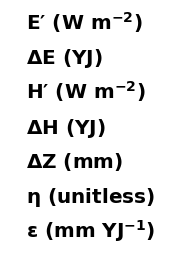

In [4]:
# Test rendering of variable symbols and units
fig, ax = plt.subplots(figsize=(2, 3))
ax.axis('off')
for v, var in enumerate(d22a.SYMBOLS_DICT.keys()):
    var_sym = d22a.SYMBOLS_DICT[var]
    units = d22a.UNITS_DICT[var]
    ax.text(0.1, 0.95-(0.15*v), f'{var_sym} ({units})', fontsize='x-large', fontweight='bold')

In [5]:
%%time
# Get calendar, number of days in year, and parent branch year for historical simulation of an ESM
d22a.get_calendar_days_branch(esm='UKESM1-0-LL_r1i1p1f2')

CPU times: user 16.7 ms, sys: 6.7 ms, total: 23.4 ms
Wall time: 33.7 ms


('360_day', 360, 2250)

In [6]:
%%time
# Get CMIP6 ESM data, including reading data and basic processing.
d22a.get_cmip6_df()

get_cmip6_df(ACCESS-CM2_r1i1p1f1, piControl): shifted start year from 950 to 1850
get_cmip6_df(ACCESS-ESM1-5_r1i1p1f1, piControl): shifted start year from 101 to 1790
get_cmip6_df(CanESM5_r1i1p1f1, piControl): shifted start year from 5201 to 1850
get_cmip6_df(EC-Earth3-Veg-LR_r1i1p1f1, piControl): shifted start year from 2300 to 1850
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): shifted start year from 1850 to 1790
get_cmip6_df(IPSL-CM6A-LR_r1i1p1f1, piControl): gap after 2789; using period before gap; length 1800 yr -> 1000 yr
get_cmip6_df(MIROC6_r1i1p1f1, piControl): shifted start year from 3200 to 1850
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, piControl): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, historical): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f1 ssp126): shifted yr-2015 zostoga from 2.0 to 69.4 mm
get_cmip6_df(MRI-ESM2-0_r1i1p1f1, ssp126): applied flux correction when calculating Hp
get_cmip6_df(MRI-ESM2-0_r1i1p1f

,ESM,Scenario,Year,Ep,E,Hp,H,Z,convert_Wm2yr_YJ
0,ACCESS-CM2_r1i1p1f1,piControl,1850,0.376755,-0.026890,0.126548,-0.001323,-1.459961,0.016098
1,ACCESS-CM2_r1i1p1f1,piControl,1851,0.491939,-0.018972,0.019186,-0.001014,-1.108704,0.016098
2,ACCESS-CM2_r1i1p1f1,piControl,1852,0.455935,-0.011632,0.134397,0.001149,-0.109741,0.016098
3,ACCESS-CM2_r1i1p1f1,piControl,1853,0.418888,-0.004889,0.087970,0.002565,0.059875,0.016098
4,ACCESS-CM2_r1i1p1f1,piControl,1854,0.382430,0.001267,0.185772,0.005556,0.322205,0.016098
...,...,...,...,...,...,...,...,...,...
29502,UKESM1-0-LL_r1i1p1f2,ssp585,2096,3.468888,3.291027,3.079318,2.017449,361.353424,0.015866
29503,UKESM1-0-LL_r1i1p1f2,ssp585,2097,3.429853,3.345446,2.697973,2.060256,367.789276,0.015866
29504,UKESM1-0-LL_r1i1p1f2,ssp585,2098,3.208143,3.396347,2.683542,2.102834,373.251892,0.015866
29505,UKESM1-0-LL_r1i1p1f2,ssp585,2099,3.837172,3.457228,3.448655,2.157551,380.574432,0.015866


In [7]:
%%time
# DataFrame containing ESM, variant, control length, calendar, and further info URL.
d22a.get_esm_info_df()

CPU times: user 29.4 ms, sys: 3.07 ms, total: 32.4 ms
Wall time: 31.8 ms


,Variant,Control length (yr),Calendar,Further information URL
Model,,,,
ACCESS-CM2,r1i1p1f1,500,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARC...
ACCESS-ESM1-5,r1i1p1f1,1000,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACC...
CMCC-CM2-SR5,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CMCC-ESM2,r1i1p1f1,500,365 day,https://furtherinfo.es-doc.org/CMIP6.CMCC.CMCC...
CNRM-CM6-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CNRM-ESM2-1,r1i1p1f2,500,gregorian,https://furtherinfo.es-doc.org/CMIP6.CNRM-CERF...
CanESM5,r1i1p1f1,1000,365 day,https://furtherinfo.es-doc.org/CMIP6.CCCma.Can...
EC-Earth3-Veg-LR,r1i1p1f1,501,proleptic gregorian,https://furtherinfo.es-doc.org/CMIP6.EC-Earth-...
IPSL-CM6A-LR,r1i1p1f1,1000,gregorian,https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL...


sample_drift(UKESM1-0-LL_r1i1p1f2, Ep, 0): standard error of mean is 0.006085866722910316


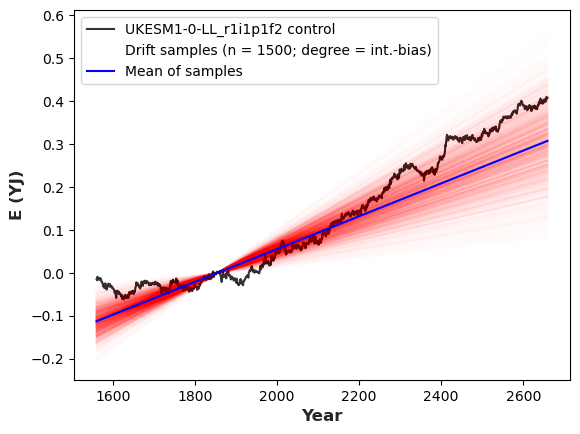

sample_drift(UKESM1-0-LL_r1i1p1f2, E, 1): standard error of trend is 3.163055350016399e-05


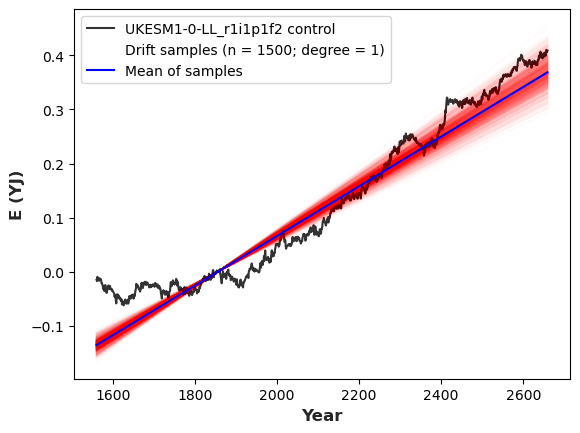

sample_drift(UKESM1-0-LL_r1i1p1f2, E, 1): standard error of trend is 3.163055350016399e-05


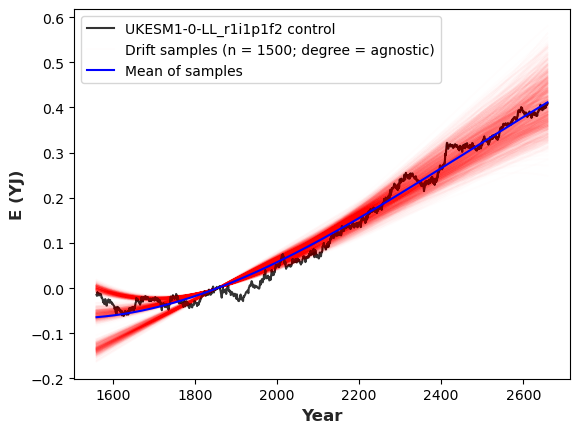

CPU times: user 6.78 s, sys: 608 ms, total: 7.39 s
Wall time: 7.39 s


<xarray.DataArray (Draw: 1500, Year: 1100)>
array([[-1.23254050e-01, -1.22835530e-01, -1.22417010e-01, ...,
         3.35862054e-01,  3.36280574e-01,  3.36699094e-01],
       [-1.33674922e-01, -1.33221017e-01, -1.32767113e-01, ...,
         3.64258489e-01,  3.64712393e-01,  3.65166298e-01],
       [-1.42363638e-01, -1.41880230e-01, -1.41396822e-01, ...,
         3.87934871e-01,  3.88418279e-01,  3.88901687e-01],
       ...,
       [ 2.22151475e-03,  1.87172380e-03,  1.52469321e-03, ...,
         3.13993898e-01,  3.14031365e-01,  3.14066774e-01],
       [ 1.04838353e-03,  7.16712465e-04,  3.87549741e-04, ...,
         5.31508944e-01,  5.32247824e-01,  5.32986145e-01],
       [ 1.47080973e-03,  1.12148933e-03,  7.74925824e-04, ...,
         3.51342164e-01,  3.51484976e-01,  3.51625923e-01]])
Coordinates:
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 ... 1493 1494 1495 1496 1497 1498 1499
  * Year     (Year) int64 1560 1561 1562 1563 1564 ... 2655 2656 2657 2658 2659

In [8]:
%%time
# Sample drift of a control simulation, using OLS with HAC. Returns samples as DataArray.
for degree in ['int.-bias', 'linear', 'agnostic']:
    drift_da = d22a.sample_drift(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, plot=True)
drift_da

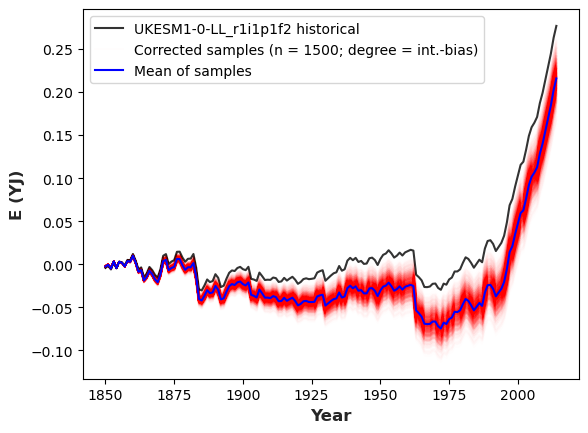

sample_drift(UKESM1-0-LL_r1i1p1f2, E, 1): standard error of trend is 3.163055350016399e-05


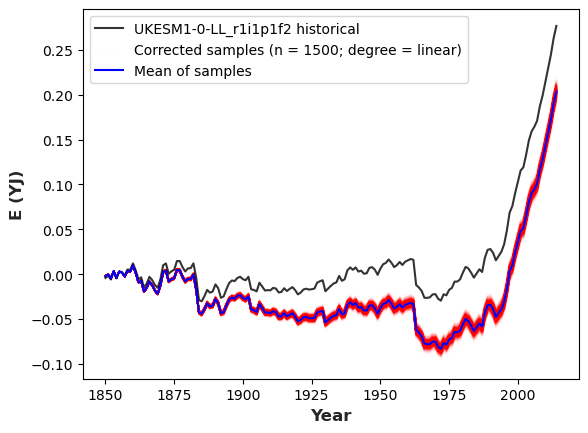

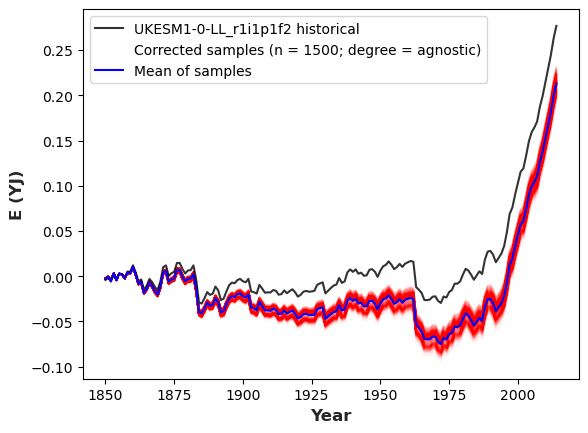

CPU times: user 5.56 s, sys: 543 ms, total: 6.11 s
Wall time: 6.12 s


<xarray.DataArray (Year: 165, Draw: 1500)>
array([[-2.30034720e-03, -2.14111486e-03, -2.00835010e-03, ...,
        -2.96612896e-03, -2.90984025e-03, -2.93385454e-03],
       [-3.59121340e-04, -2.35273963e-04, -1.32012483e-04, ...,
        -8.73008366e-04, -8.28658205e-04, -8.47774642e-04],
       [-4.89490498e-03, -4.80644257e-03, -4.73268437e-03, ...,
        -5.25838368e-03, -5.22618304e-03, -5.24023960e-03],
       ...,
       [ 1.78546965e-01,  1.72973833e-01,  1.68327066e-01, ...,
         1.86159405e-01,  1.80419908e-01,  1.84286877e-01],
       [ 1.96519860e-01,  1.90911343e-01,  1.86235074e-01, ...,
         2.04100687e-01,  1.98294254e-01,  2.02210830e-01],
       [ 2.09938648e-01,  2.04294746e-01,  1.99588973e-01, ...,
         2.17487088e-01,  2.11613248e-01,  2.15579822e-01]])
Coordinates:
  * Year     (Year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 ... 1493 1494 1495 1496 1497 1498 1499

In [9]:
%%time
# Apply MCDC to get drift corrected samples.
for degree in ['int.-bias', 'linear', 'agnostic']:
    corr_da = d22a.sample_corrected(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, scenario='historical', plot=True)
corr_da

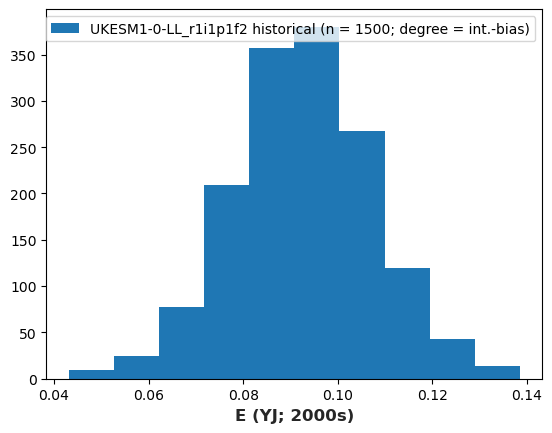

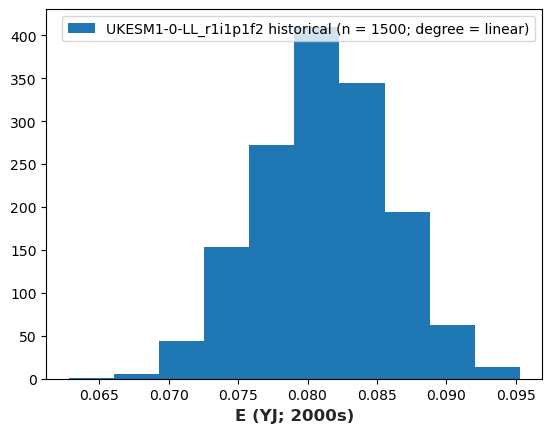

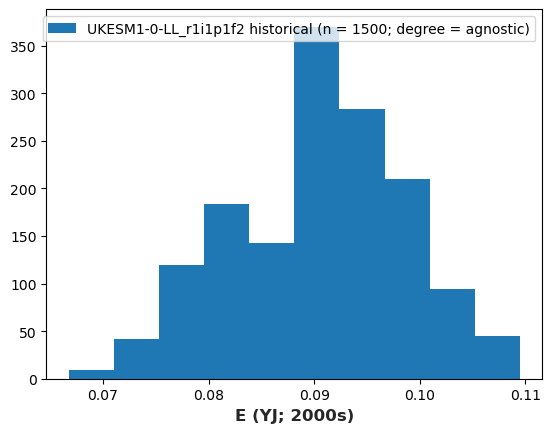

CPU times: user 183 ms, sys: 6.73 ms, total: 189 ms
Wall time: 188 ms


<xarray.DataArray (Draw: 1500)>
array([0.08721446, 0.08190672, 0.07748122, ..., 0.09503551, 0.08978135,
       0.09329016])
Coordinates:
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 ... 1493 1494 1495 1496 1497 1498 1499

In [10]:
%%time
# Decadal-mean drift-corrected samples.
for degree in ['int.-bias', 'linear', 'agnostic']:
    decadal_da = d22a.sample_target_decade(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, scenario='historical',
                                           target_decade='2000s', plot=True)
decadal_da

sample_drift(UKESM1-0-LL_r1i1p1f2, Hp, 0): standard error of mean is 0.005901459726878913


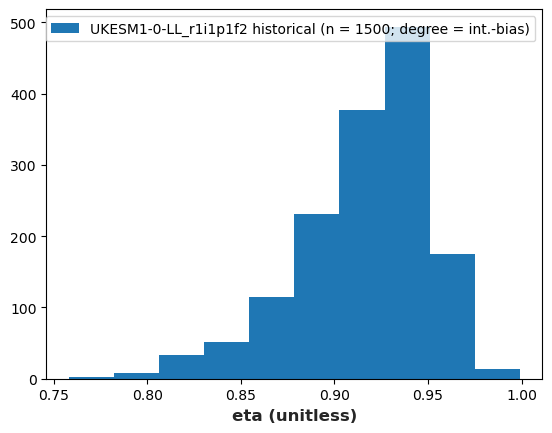

sample_drift(UKESM1-0-LL_r1i1p1f2, H, 1): standard error of trend is 3.1606286382530085e-05


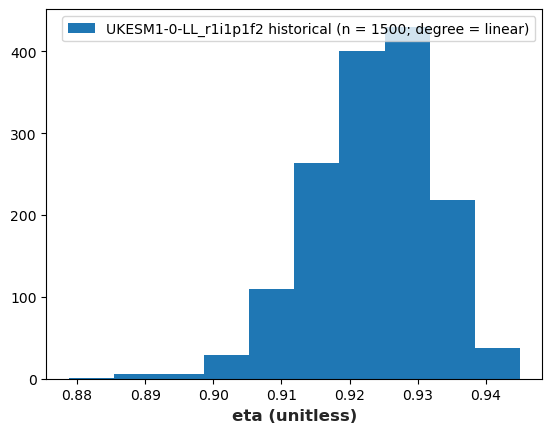

sample_drift(UKESM1-0-LL_r1i1p1f2, H, 1): standard error of trend is 3.1606286382530085e-05


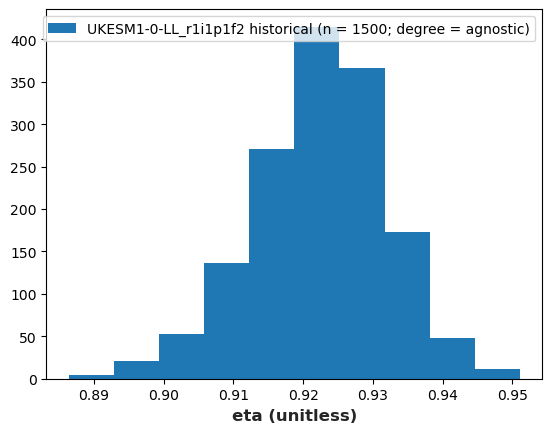

sample_drift(UKESM1-0-LL_r1i1p1f2, Z, 1): standard error of trend is 0.00368951664841096


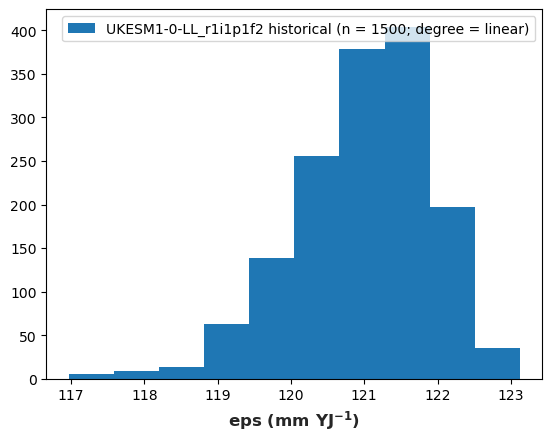

sample_drift(UKESM1-0-LL_r1i1p1f2, Z, 1): standard error of trend is 0.00368951664841096


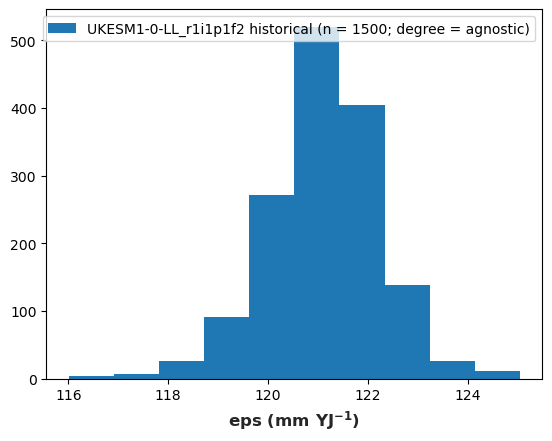

CPU times: user 1.5 s, sys: 32.2 ms, total: 1.53 s
Wall time: 1.53 s


<xarray.DataArray (Draw: 1500)>
array([120.86604018, 122.28212541, 121.21410873, ..., 121.14842548,
       119.88846062, 121.07835884])
Coordinates:
  * Draw     (Draw) int64 0 1 2 3 4 5 6 7 ... 1493 1494 1495 1496 1497 1498 1499

In [11]:
%%time
# Samples of eta or epsilon coefficients
for degree in ['int.-bias', 'linear', 'agnostic']:
    coeff_da = d22a.sample_eta_eps(esm='UKESM1-0-LL_r1i1p1f2', eta_or_eps='eta', degree=degree, scenario='historical', plot=True)
for degree in ['linear', 'agnostic']:
    coeff_da = d22a.sample_eta_eps(esm='UKESM1-0-LL_r1i1p1f2', eta_or_eps='eps', degree=degree, scenario='historical', plot=True)
coeff_da

In [12]:
%%time
# Calculate drift uncertainty using 2nd-98th percentiles of drift-corrected samples.
for degree in ('int.-bias', 'linear', 'agnostic'):
    uncertainty = d22a.calc_drift_uncertainty(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, scenario='ssp585',
                                              target_decade='2050s')
    print(uncertainty)

0.08363963368179173
0.02631055826572215
0.039459655294316054
CPU times: user 9.55 ms, sys: 2.31 ms, total: 11.9 ms
Wall time: 10.8 ms


In [13]:
%%time
# Calculate scenario uncertainty based on the inter-scenario range across SSPs.
uncertainty = d22a.calc_scenario_uncertainty(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, target_decade='2050s')
print(uncertainty)

0.25327078104019174
CPU times: user 11.1 ms, sys: 2.96 ms, total: 14 ms
Wall time: 12.7 ms


In [14]:
%%time
# Calculate model uncertainty using the inter-model range across ensemble.
uncertainty = d22a.calc_model_uncertainty(variable='E', degree=degree, scenario='ssp585', target_decade='2050s')
print(uncertainty)

0.8268527864638713
CPU times: user 251 ms, sys: 43.9 ms, total: 295 ms
Wall time: 295 ms


In [15]:
%%time
# Detailed table (as DataFrame) showing drift, model, and scenario uncertainty
detailed_df = d22a.get_detailed_df(variable='E', target_decade='2050s')
detailed_df

CPU times: user 665 ms, sys: 101 ms, total: 766 ms
Wall time: 768 ms


Drift uncertainty                 Other uncertainty         
                         Int.-bias Linear Agnostic             Model Scenario
ACCESS-CM2                    0.11   0.04     0.13               NaN     0.17
ACCESS-ESM1-5                 0.05   0.01     0.04               NaN     0.21
CMCC-CM2-SR5                  0.21   0.08     0.18               NaN     0.18
CMCC-ESM2                     0.17   0.08     0.20               NaN     0.20
CNRM-CM6-1                    0.13   0.03     0.20               NaN     0.16
CNRM-ESM2-1                   0.15   0.03     0.24               NaN     0.10
CanESM5                       0.05   0.01     0.06               NaN     0.30
EC-Earth3-Veg-LR              0.16   0.04     0.23               NaN     0.16
IPSL-CM6A-LR                  0.10   0.02     0.08               NaN     0.20
MIROC6                        0.06   0.01     0.10               NaN     0.16
MPI-ESM1-2-HR                 0.13   0.02     0.16               NaN     0.17
MPI-ESM1-2-LR                 0.05   0.01     0.05               NaN     0.16
MRI-ESM2-0                    0.08   0.03     0.11               NaN     0.18
NorESM2-LM                    0.08   0.01     0.15               NaN     0.14
NorESM2-MM                    0.09   0.01     0.12               NaN     0.13
UKESM1-0-LL                   0.08   0.03     0.04               NaN     0.25
SSP1-2.6                       NaN    NaN      NaN              0.64      NaN
SSP2-4.5                       NaN    NaN      NaN              0.72      NaN
SSP3-7.0                       NaN    NaN      NaN              0.90      NaN
SSP5-8.5                       NaN    NaN      NaN              0.83      NaN
Min                           0.05   0.01     0.04              0.64     0.10
Median                        0.09   0.02     0.12              0.72     0.17
Max                           0.21   0.08     0.24              0.90     0.30

In [16]:
%%time
# Summary DataFrame showing drift, model, and scenario uncertainty for multiple variables.
summary_df = d22a.get_summary_df()
summary_df

CPU times: user 1min 11s, sys: 674 ms, total: 1min 12s
Wall time: 1min 12s


$\Delta E$ (2050s; YJ) $\Delta H$ (2050s; YJ)  \
Drift uncertainty Int.-bias       0.09 (0.05–0.21)       0.09 (0.04–0.19)   
                  Linear          0.02 (0.01–0.08)       0.02 (0.01–0.08)   
                  Agnostic        0.12 (0.04–0.24)       0.12 (0.04–0.31)   
Other uncertainty Model           0.72 (0.64–0.90)       0.75 (0.72–0.89)   
                  Scenario        0.17 (0.10–0.30)       0.16 (0.09–0.29)   

                            $\Delta Z$ (2050s; mm)  \
Drift uncertainty Int.-bias                    NaN   
                  Linear                  2 (1–11)   
                  Agnostic               16 (5–36)   
Other uncertainty Model                 76 (74–98)   
                  Scenario              21 (12–38)   

                            $\eta$ (2015–2100; unitless)  \
Drift uncertainty Int.-bias             0.03 (0.01–0.07)   
                  Linear                0.01 (0.00–0.03)   
                  Agnostic              0.06 (0.01–0.14)   
Other uncertainty Model                 0.17 (0.16–0.18)   
                  Scenario              0.01 (0.01–0.08)   

                            $\epsilon$ (2015–2100; mm YJ$^{-1}$)  
Drift uncertainty Int.-bias                                  NaN  
                  Linear                                 1 (0–3)  
                  Agnostic                              7 (1–20)  
Other uncertainty Model                               12 (11–13)  
                  Scenario                              7 (4–10)

CPU times: user 13.8 ms, sys: 5.05 ms, total: 18.9 ms
Wall time: 17.4 ms


<Axes: xlabel='Year', ylabel='$E \\prime$ (W m$^{-2}$)'>

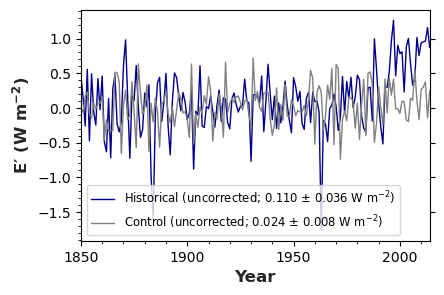

In [17]:
%%time
# Plot uncorrected time series for variable and scenario(s)
d22a.plot_uncorrected_timeseries(esm='UKESM1-0-LL_r1i1p1f2', variable='Ep', scenarios=('piControl', 'historical'),
                                 title=None, legend=True, label_mean=True, ax=None)

CPU times: user 1.17 s, sys: 37 ms, total: 1.21 s
Wall time: 1.21 s


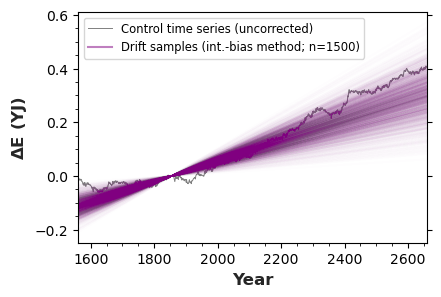

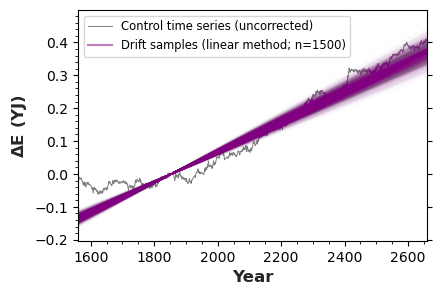

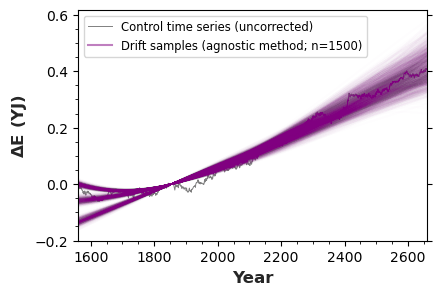

In [18]:
%%time
# Plot uncorrected control time series with drift samples.
for degree in ['int.-bias', 'linear', 'agnostic']:
    d22a.plot_control_with_drift(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree, title=None, legend=True, ax=None)

CPU times: user 1.25 s, sys: 43.5 ms, total: 1.29 s
Wall time: 1.29 s


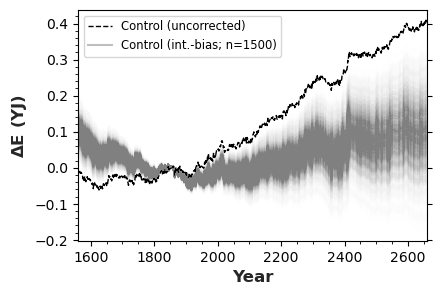

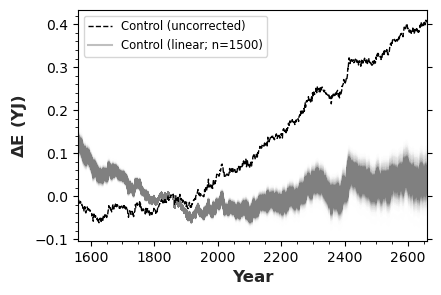

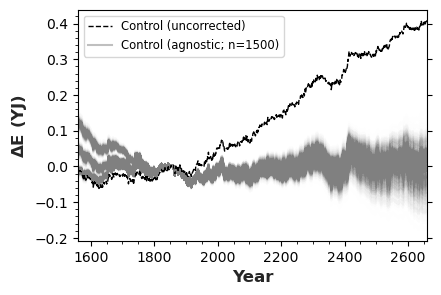

In [19]:
%%time
# Plot drift corrected time series for variable and scenario.
for degree in ['int.-bias', 'linear', 'agnostic']:
    d22a.plot_corrected_timeseries(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degree=degree,
                                   scenarios=('piControl',),
                                   plot_uncorrected=True, title=None, legend=True, ax=None)

CPU times: user 2.72 s, sys: 49 ms, total: 2.77 s
Wall time: 2.77 s


<Axes: xlabel='$\\Delta E$ (YJ)', ylabel='$\\Delta H$ (YJ)'>

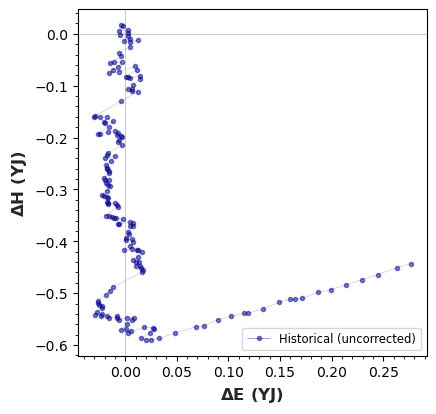

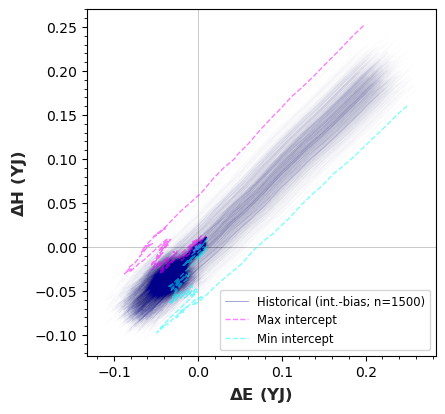

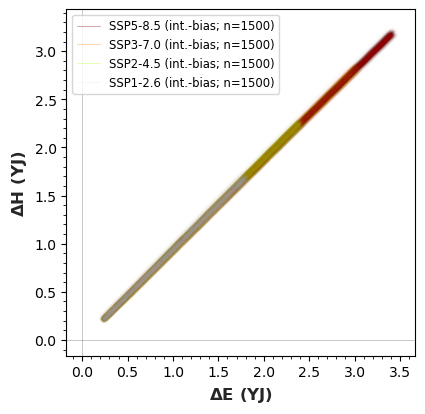

In [20]:
%%time
# Scatter (uncorrected) and/or line (corrected) plot of y_var vs x_var.
d22a.scatter_line_rel(esm='UKESM1-0-LL_r1i1p1f2', x_var='E', y_var='H', scenarios=('historical',),
                      plot_uncorrected=True, degree=None, plot_largest_intercept=False,
                      title=None, legend=True, ax=None)
d22a.scatter_line_rel(esm='UKESM1-0-LL_r1i1p1f2', x_var='E', y_var='H', scenarios=('historical',),
                      plot_uncorrected=False, degree='int.-bias', plot_largest_intercept=True,
                      title=None, legend=True, ax=None)
d22a.scatter_line_rel(esm='UKESM1-0-LL_r1i1p1f2', x_var='E', y_var='H', scenarios=True,
                      plot_uncorrected=False, degree='int.-bias', plot_largest_intercept=False,
                      title=None, legend=True, ax=None)

CPU times: user 423 ms, sys: 6.3 ms, total: 429 ms
Wall time: 426 ms


<Axes: xlabel='$\\eta$ (unitless)', ylabel='Count'>

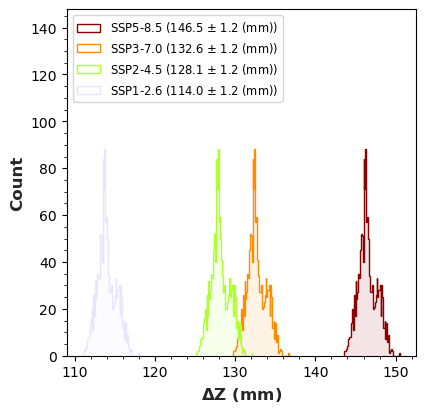

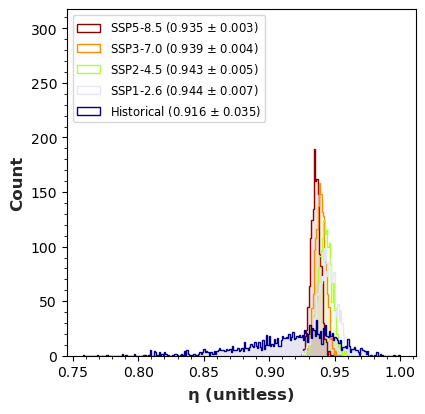

In [21]:
%%time
# Plot histogram of (i) E/H/Z for a target decade or (ii) eta/eps coefficient
d22a.histogram_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='Z', degree='agnostic', scenarios=True,
                           target_decade='2050s')
d22a.histogram_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='eta', degree='int.-bias', scenarios=True,
                           target_decade=None)

CPU times: user 514 ms, sys: 4.74 ms, total: 519 ms
Wall time: 519 ms


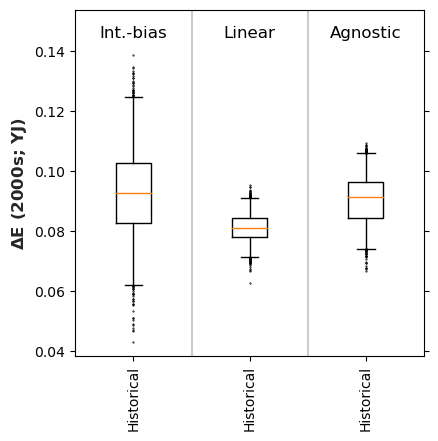

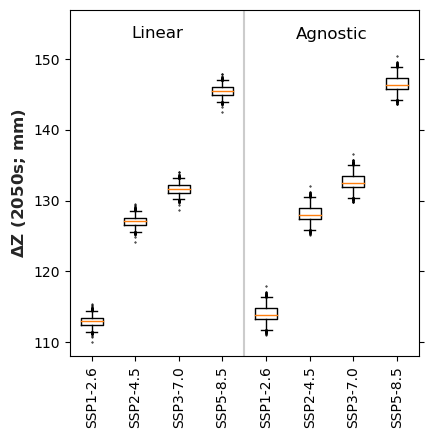

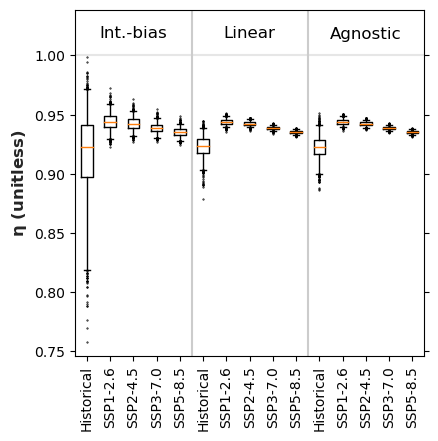

In [22]:
%%time
# Plot box and whisker plots of (i) E/H/Z for a target decade or (ii) eta/eps coefficient.
ax = d22a.boxplot_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degrees=True, scenarios=True, target_decade='2000s')
ax = d22a.boxplot_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='Z', degrees=True, scenarios=True, target_decade='2050s')
ax = d22a.boxplot_of_variable(esm='UKESM1-0-LL_r1i1p1f2', variable='eta', degrees=True, scenarios=True, target_decade=None)

CPU times: user 76.7 ms, sys: 6.32 ms, total: 83.1 ms
Wall time: 83 ms


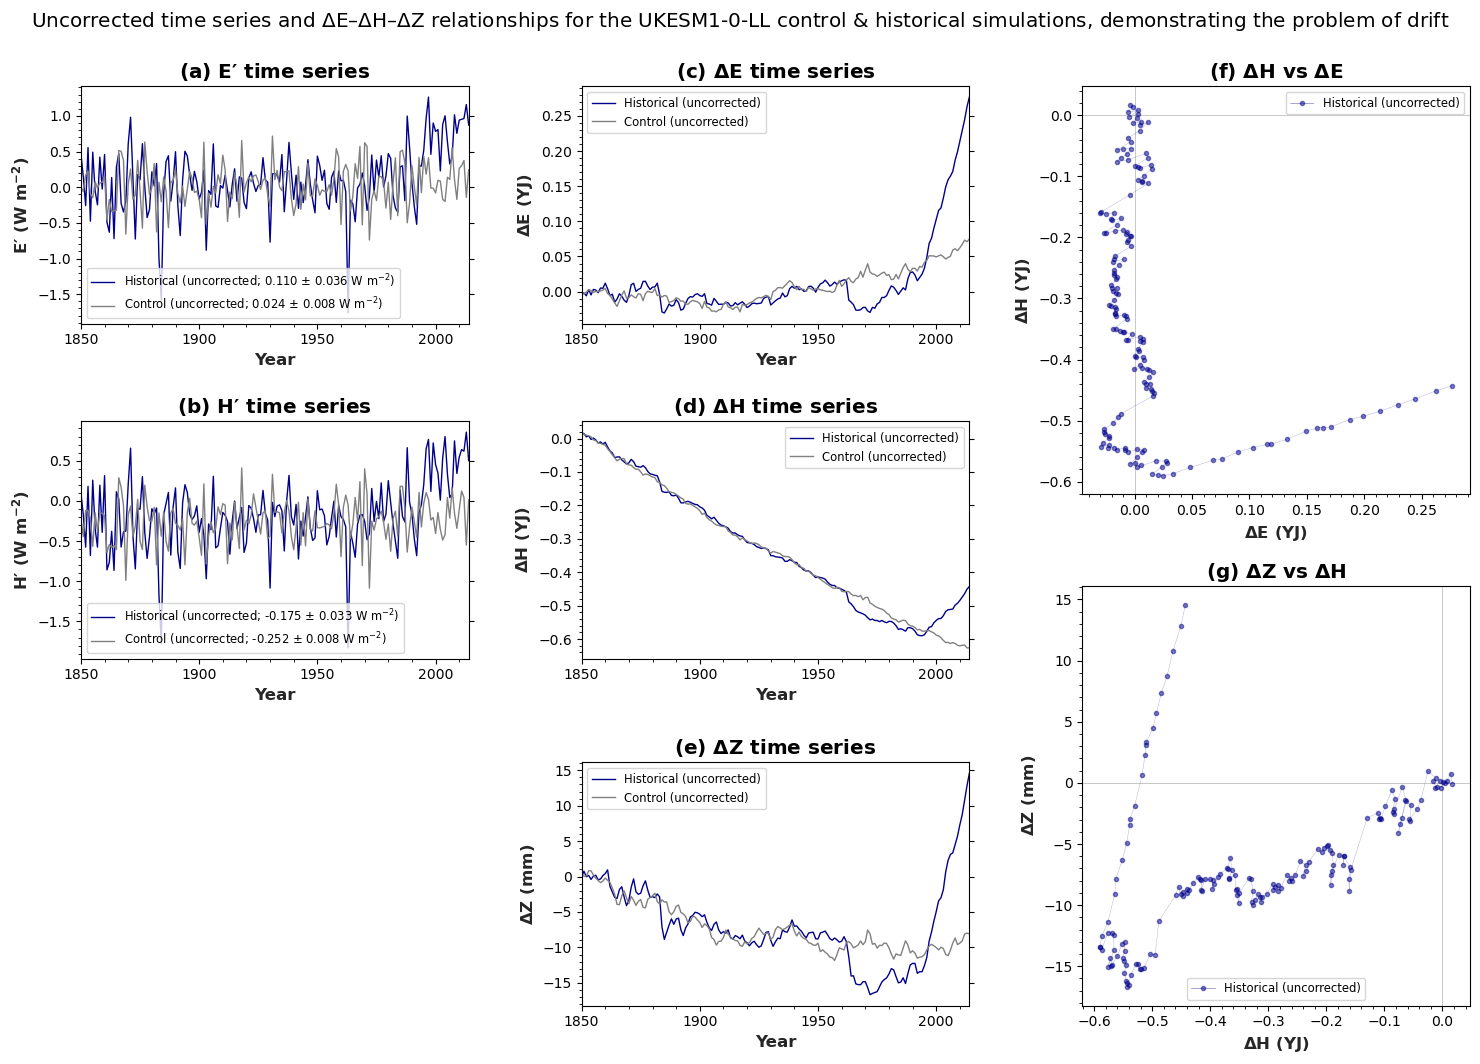

In [23]:
%%time
# Demonstrate problem of drift by showing uncorrected time series and relationships.
fig = d22a.composite_problem_of_drift(esm='UKESM1-0-LL_r1i1p1f2')

CPU times: user 3.33 s, sys: 84.6 ms, total: 3.42 s
Wall time: 3.42 s


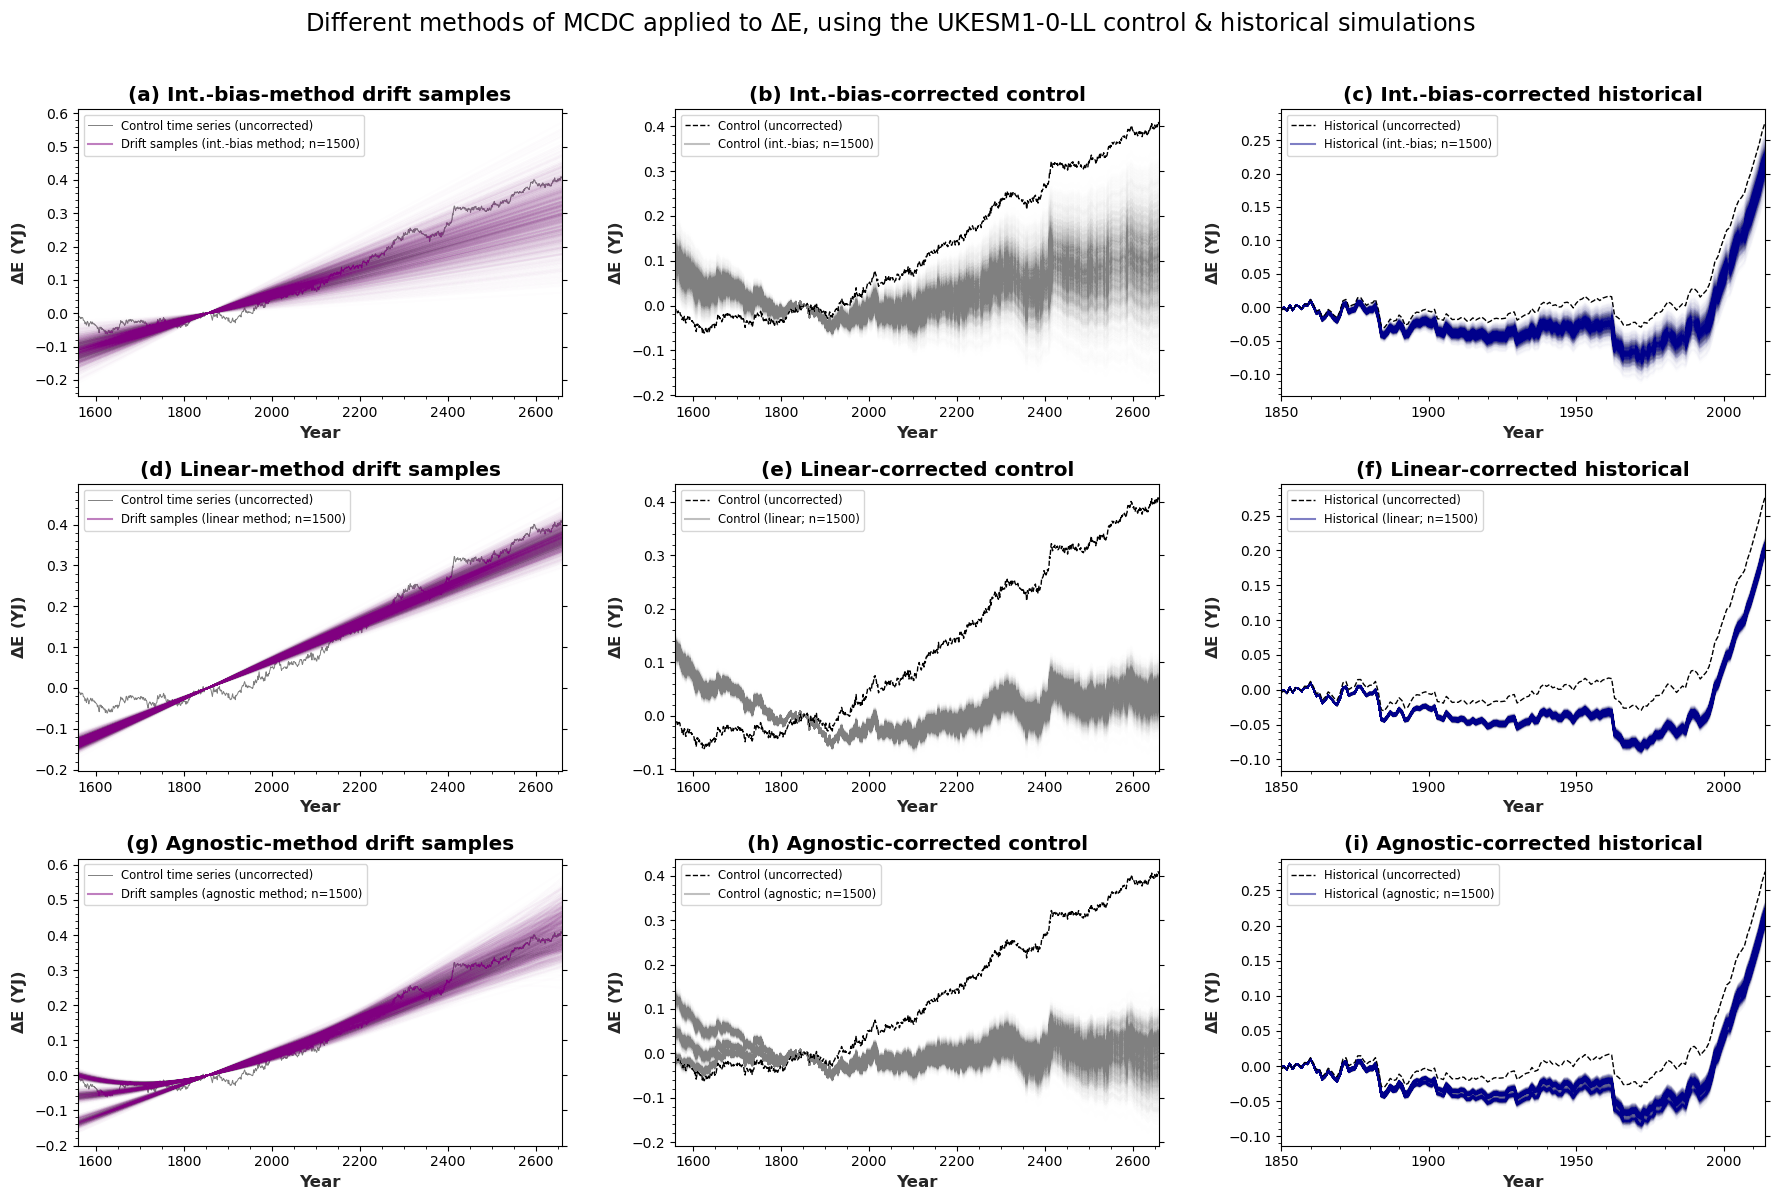

In [24]:
%%time
# Compare int.-bias, linear, and agnostic methods (ie degrees) of MCDC by plotting time series
fig = d22a.composite_compare_methods_timeseries(esm='UKESM1-0-LL_r1i1p1f2', variable='E', degrees=True)

CPU times: user 122 ms, sys: 15.7 ms, total: 138 ms
Wall time: 136 ms


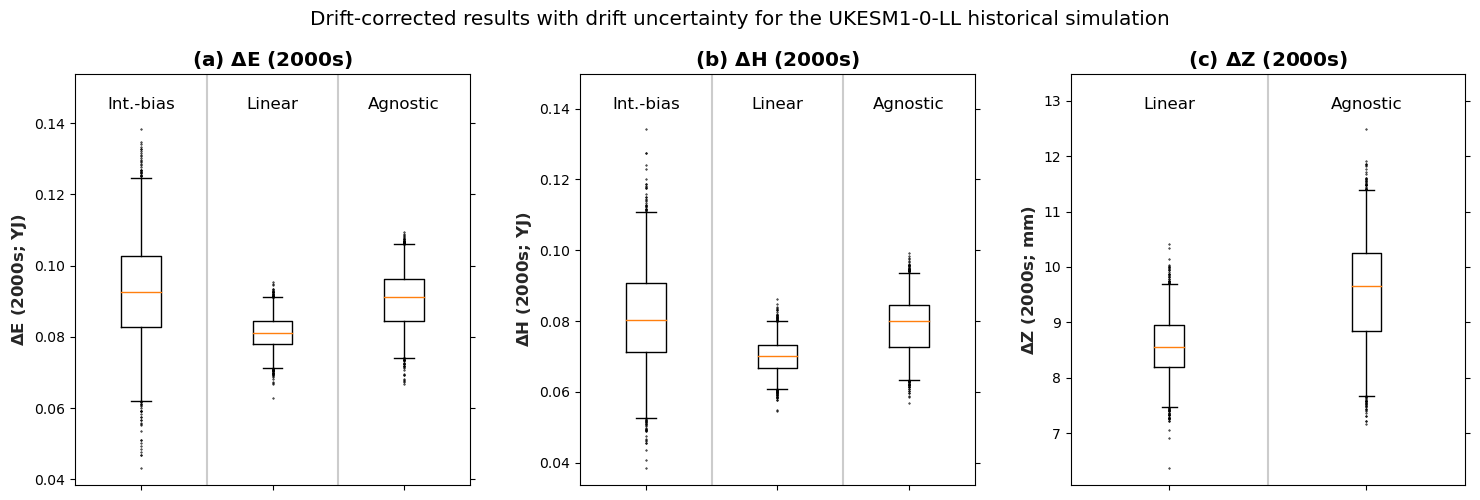

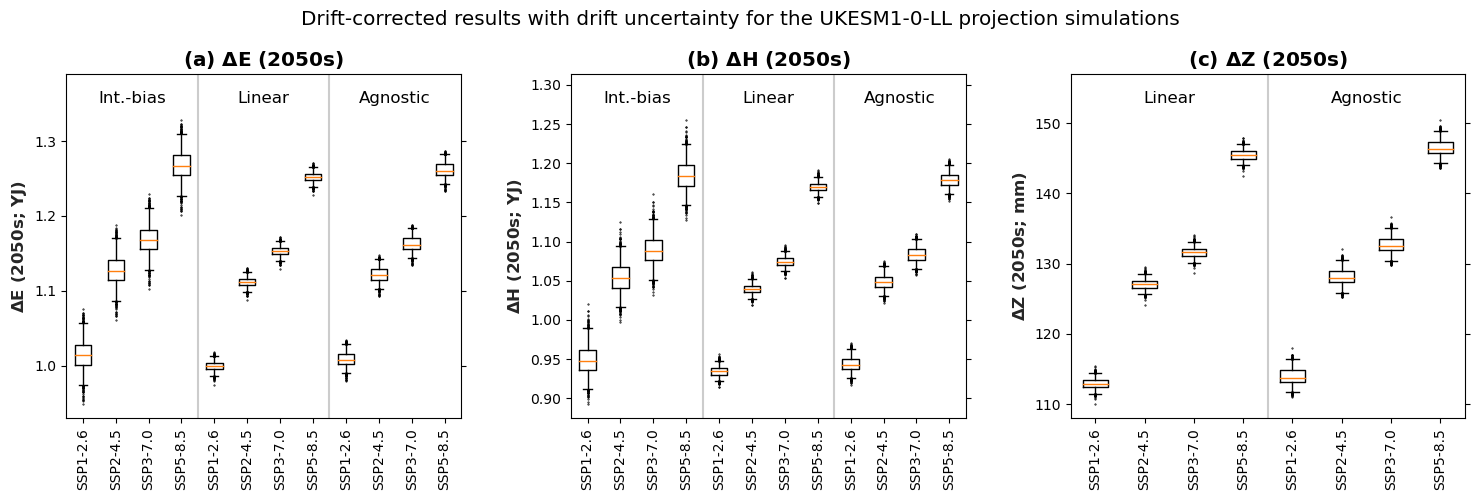

In [25]:
%%time
# Produce boxplots of drift-corrected results for multiple variables from one ESM.
fig = d22a.composite_boxplots(esm='UKESM1-0-LL_r1i1p1f2', variables=('E', 'H', 'Z'), target_decade='2000s', degrees=True, scenarios=True)
fig = d22a.composite_boxplots(esm='UKESM1-0-LL_r1i1p1f2', variables=('E', 'H', 'Z'), target_decade='2050s', degrees=True, scenarios=True)

CPU times: user 11.6 s, sys: 222 ms, total: 11.8 s
Wall time: 11.8 s


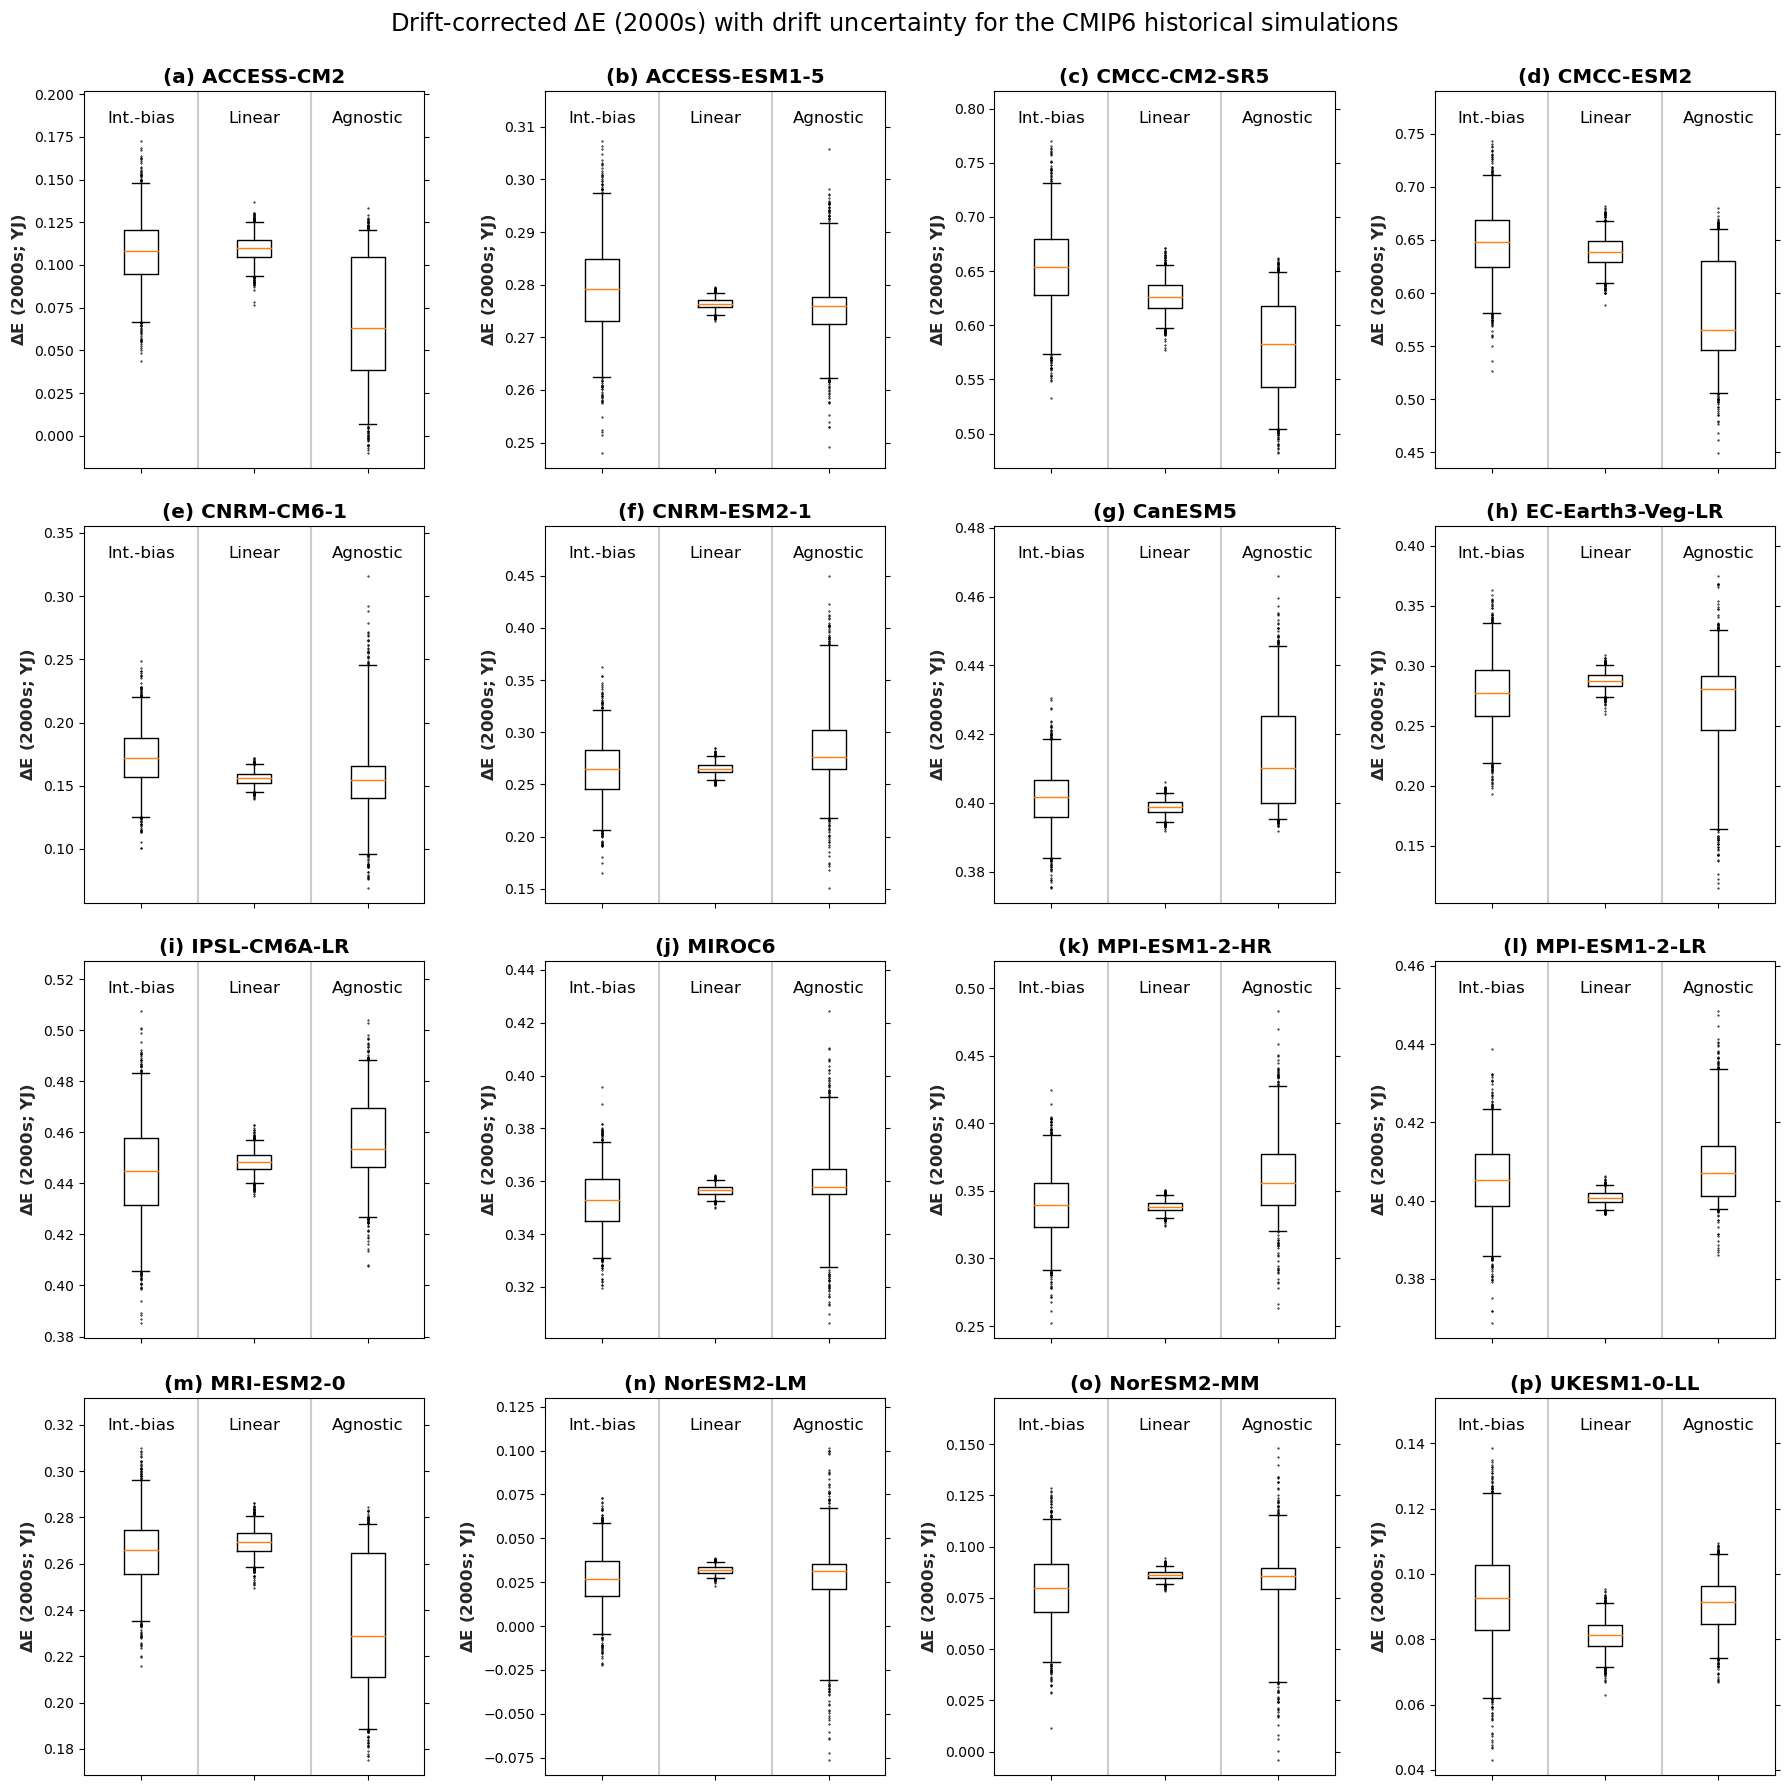

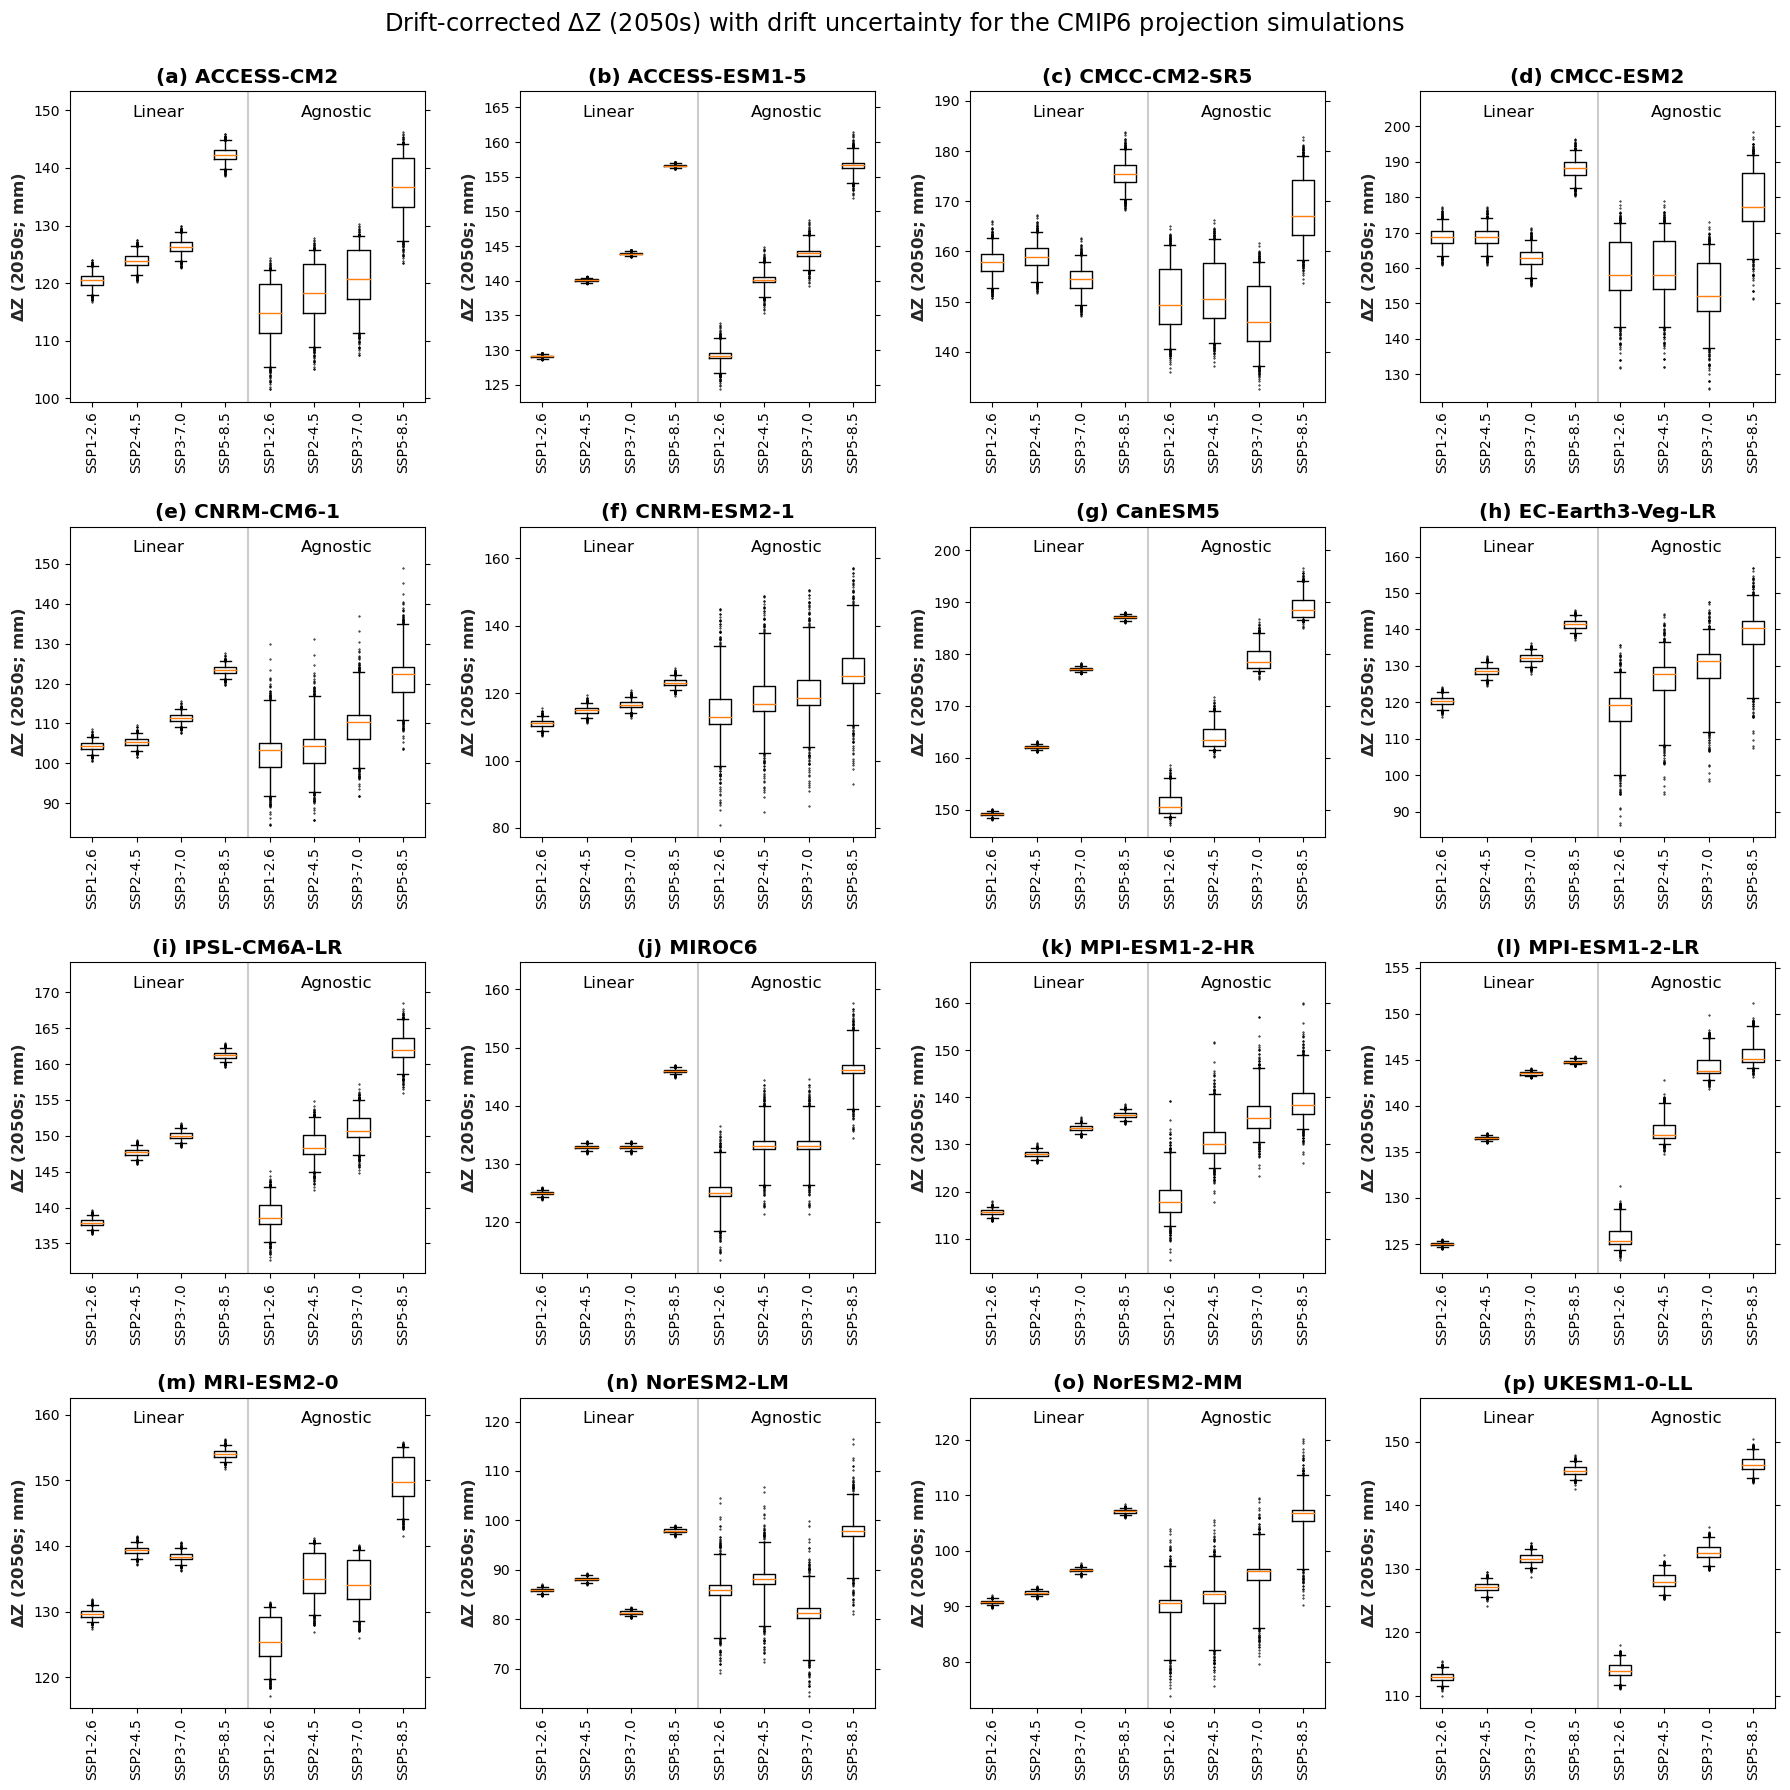

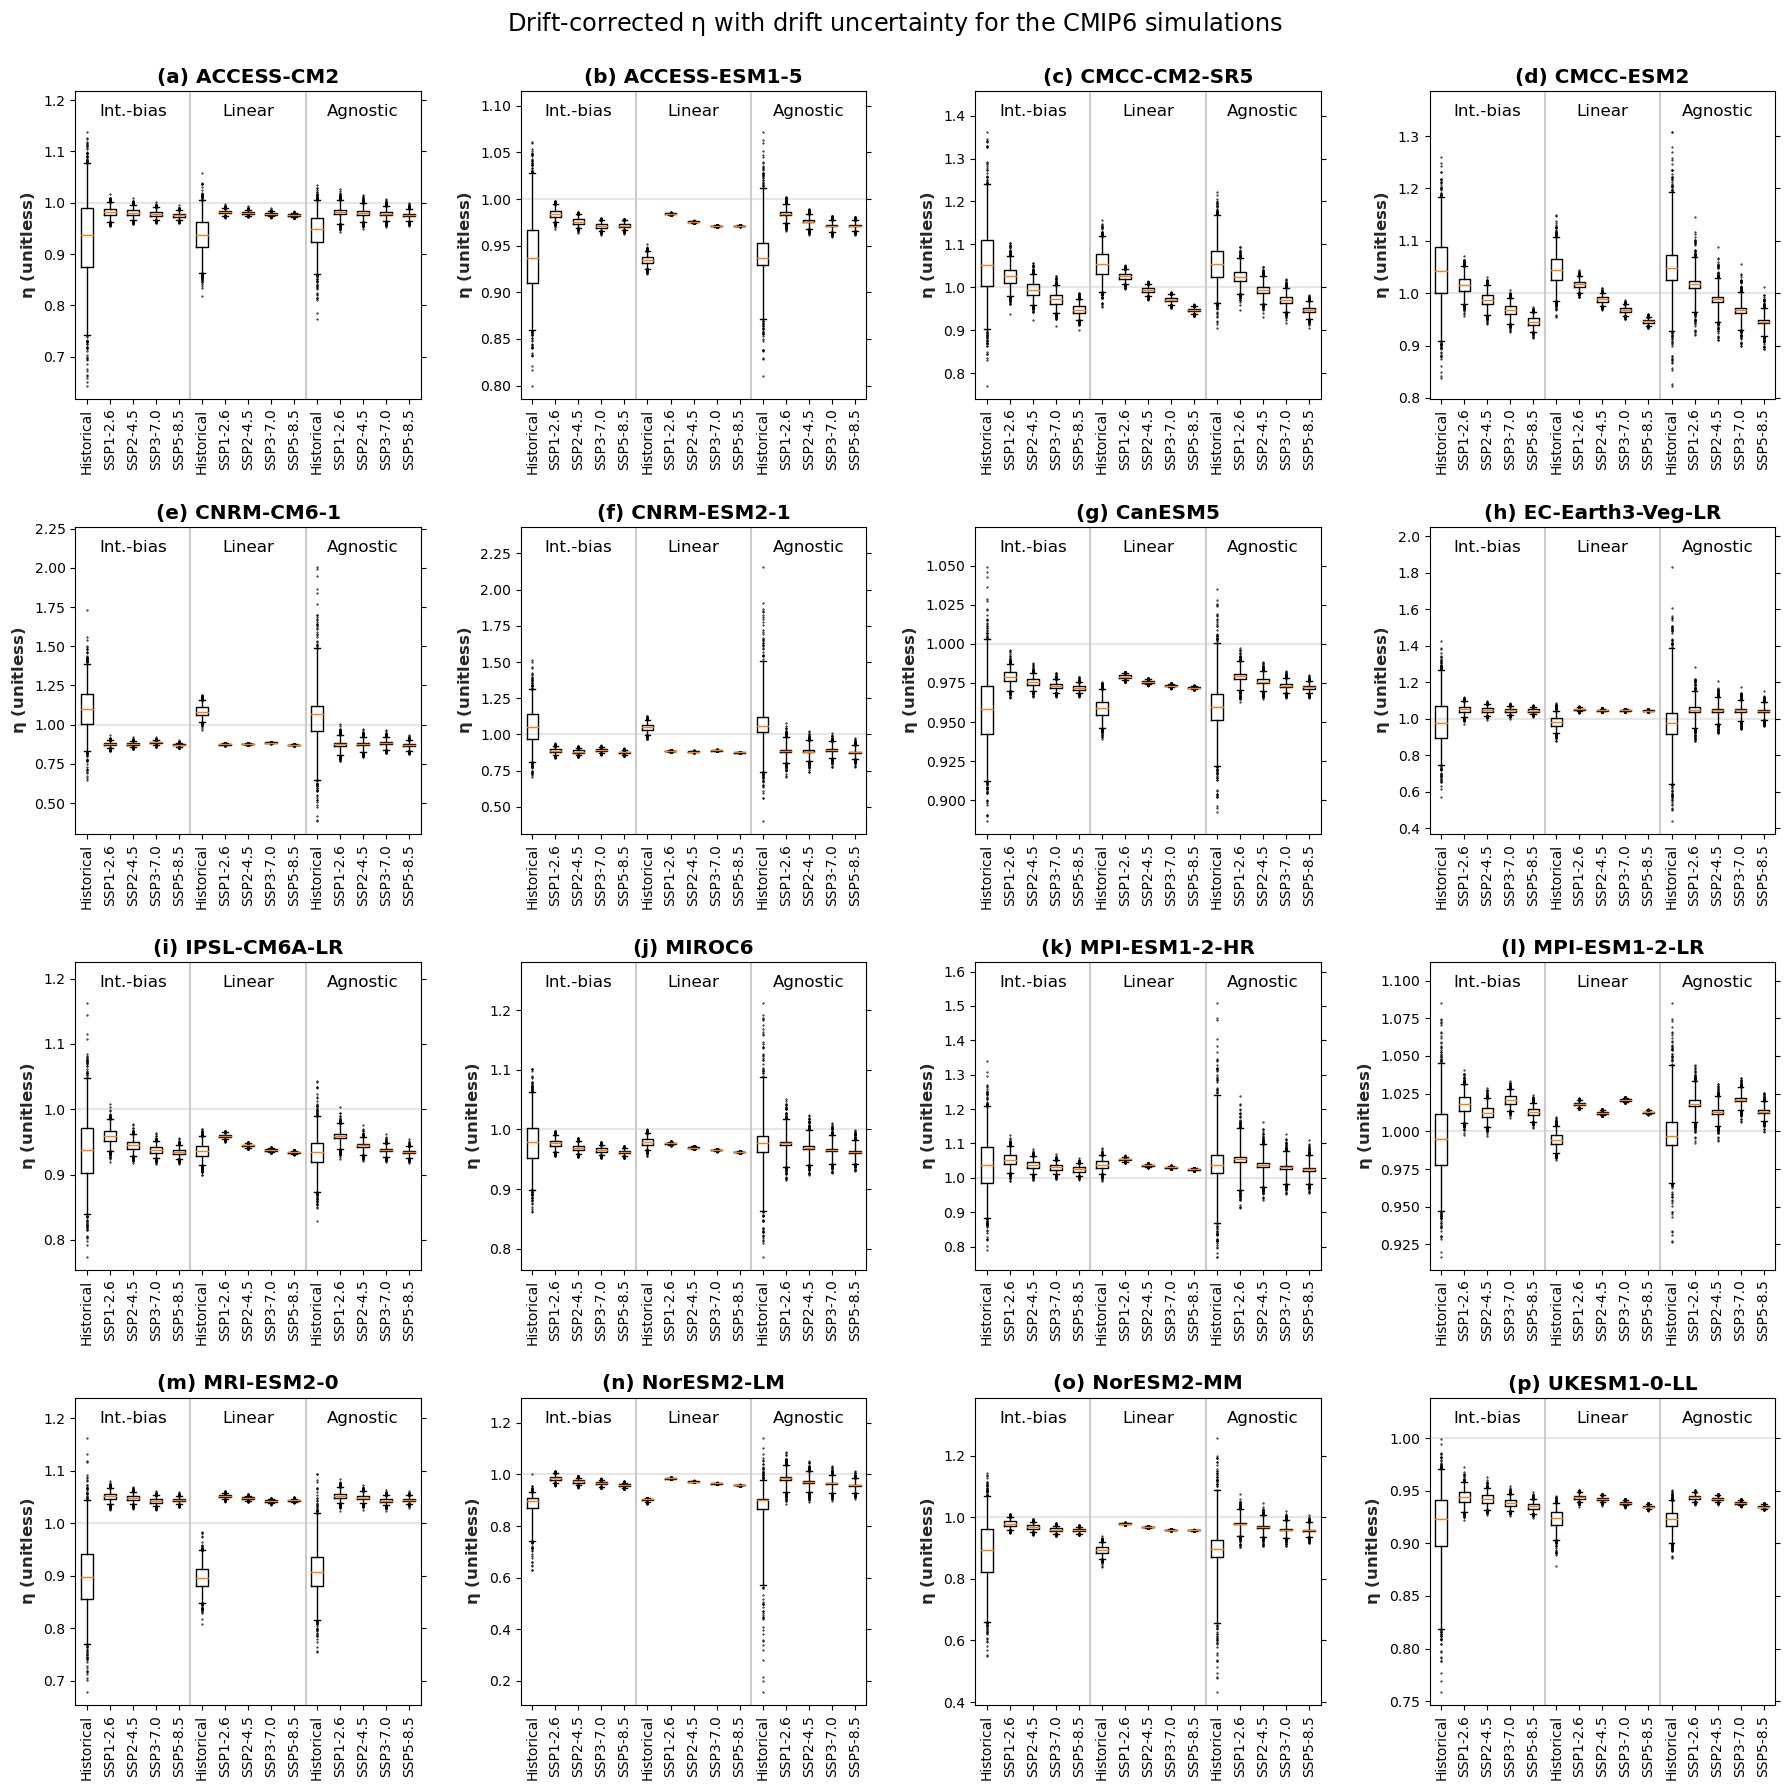

In [26]:
%%time
# Fig showing boxplots of drift-corrected results for the CMIP6 ensemble
_ = d22a.ensemble_boxplots(esms=True, variable='E', target_decade='2000s', degrees=True, scenarios=True)
_ = d22a.ensemble_boxplots(esms=True, variable='Z', target_decade='2050s', degrees=True, scenarios=True)
_ = d22a.ensemble_boxplots(esms=True, variable='eta', target_decade=None, degrees=True, scenarios=True)

CPU times: user 5.67 s, sys: 56.8 ms, total: 5.73 s
Wall time: 5.71 s


/Users/benjamin/miniconda3/envs/d22a-mcdc/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


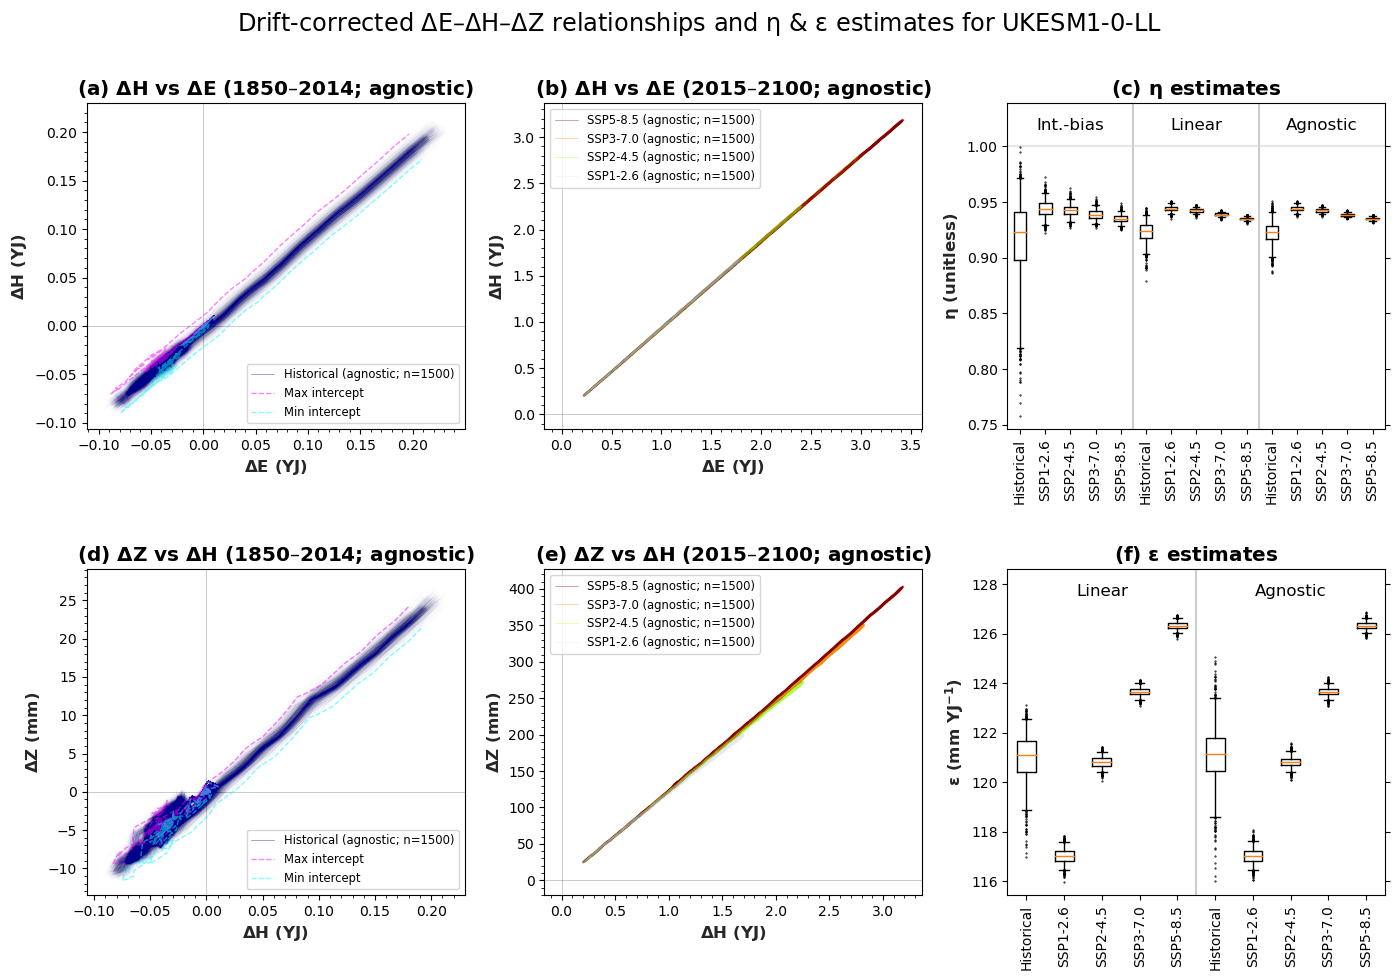

In [27]:
%%time
# Fig showing E-H-Z relationships and eta & eps boxplots for one ESM
_ = d22a.composite_rel_eta_eps_demo(esm='UKESM1-0-LL_r1i1p1f2', degree='agnostic')

In [28]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2023-07-25 15:42:03
End:       2023-07-25 15:45:26
Wall time: 203 s
